<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;font-weight:10px">
  <h1 style="color: #333;"><strong>Importing Libraries</strong></h1>
</div>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advance data visualization
import sqlite3 as sql
import plotly.express as px # Data Visualization



/kaggle/input/ecommerce-data-analysis/time_dim.csv
/kaggle/input/ecommerce-data-analysis/fact_table.csv
/kaggle/input/ecommerce-data-analysis/Trans_dim.csv
/kaggle/input/ecommerce-data-analysis/item_dim.csv
/kaggle/input/ecommerce-data-analysis/store_dim.csv
/kaggle/input/ecommerce-data-analysis/customer_dim.csv


<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Loading and Checking the dataset</strong></h1>
</div>

In [ ]:
time = pd.read_csv("/content/time_dim.csv")
fact = pd.read_csv("/content/fact_dim.csv")
trans = pd.read_csv("/content/Trans_dim.csv")
item = pd.read_csv("/content/item_dim.csv", encoding="ISO-8859-1")
store = pd.read_csv("/content/store_dim.csv")
customer = pd.read_csv("/content/customer_dim.csv", encoding="ISO-8859-1")

In [ ]:
time.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [ ]:
fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [ ]:
trans.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [ ]:
item.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [ ]:
store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [ ]:
customer.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [ ]:
df = store.merge(fact,on = "store_key")
df = df.merge(customer,on = "coustomer_key")
df = df.merge(item, on = "item_key")
df = df.merge(trans, on = "payment_key")
df = df.merge(time, on = "time_key")

In [ ]:
df.head()

,store_key,division,district,upazila,payment_key,coustomer_key,time_key,item_key,quantity,unit_x,...,unit_y,trans_type,bank_name,date,hour,day,week,month,quarter,year
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ,P011,C000470,T070430,I00093,11,bottles,...,bottles,card,Eastern Bank Limited,19-12-2017 13:05,13,19,3rd Week,12,Q4,2017
1,S0001,SYLHET,HABIGANJ,AJMIRIGANJ,P038,C006880,T030846,I00099,1,oz,...,oz,mobile,Rocket,27-10-2020 13:19,13,27,4th Week,10,Q4,2020
2,S0001,SYLHET,HABIGANJ,AJMIRIGANJ,P022,C000199,T047135,I00140,1,ct,...,ct,card,NRB Commercial Bank Ltd,10-10-2019 12:51,12,10,2nd Week,10,Q4,2019
3,S0001,SYLHET,HABIGANJ,AJMIRIGANJ,P013,C004969,T019043,I00216,11,ct,...,ct,card,Jamuna Bank Limited,27-11-2020 16:28,16,27,4th Week,11,Q4,2020
4,S0001,SYLHET,HABIGANJ,AJMIRIGANJ,P012,C002554,T018268,I00194,3,bars,...,bars,card,IFIC Bank Limited,06-01-2016 23:47,23,6,1st Week,1,Q1,2016


<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Information About the dataset</strong></h1>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   store_key      1000000 non-null  object 
 1   division       1000000 non-null  object 
 2   district       1000000 non-null  object 
 3   upazila        1000000 non-null  object 
 4   payment_key    1000000 non-null  object 
 5   coustomer_key  1000000 non-null  object 
 6   time_key       1000000 non-null  object 
 7   item_key       1000000 non-null  object 
 8   quantity       1000000 non-null  int64  
 9   unit_x         996277 non-null   object 
 10  unit_price_x   1000000 non-null  float64
 11  total_price    1000000 non-null  float64
 12  name           997010 non-null   object 
 13  contact_no     1000000 non-null  int64  
 14  nid            1000000 non-null  int64  
 15  item_name      1000000 non-null  object 
 16  desc           1000000 non-null  object 
 17  unit_pric

In [ ]:
df['unit'] = df['unit_x'].fillna(df['unit_y'])
df['unit_price'] = df['unit_price_x'].fillna(df['unit_price_y'])
df['customer_key'] = df['coustomer_key']
df['sub-district'] = df['upazila']
df['item_description'] = df['desc']

In [ ]:
df = df.drop(columns = ['unit_x', 'unit_y', 'unit_price_y', 'unit_price_x',
                         'coustomer_key', 'upazila', 'desc', 'name', 'nid',
                         'contact_no'])

In [ ]:
df.describe()

,quantity,total_price,hour,day,month,year,unit_price
count,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,105.401436,11.542591,15.77572,6.518765,2017.050811,17.561602
std,3.161932,80.829301,6.903028,8.80161,3.447577,2.016437,8.637097
min,1.000000,6.000000,0.000000,1.00000,1.000000,2014.000000,6.000000
25%,3.000000,47.250000,6.000000,8.00000,4.000000,2015.000000,13.000000
50%,6.000000,90.000000,12.000000,16.00000,7.000000,2017.000000,16.000000
75%,9.000000,144.000000,18.000000,23.00000,10.000000,2019.000000,20.000000
max,11.000000,605.000000,23.000000,31.00000,12.000000,2021.000000,55.000000


In [ ]:
df.describe(include=[object])

,store_key,division,district,payment_key,time_key,item_key,item_name,man_country,supplier,trans_type,bank_name,date,week,quarter,unit,customer_key,sub-district,item_description
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,974410,1000000,1000000,1000000,996277,1000000,1000000,1000000
unique,726,7,64,39,99993,264,259,10,10,3,38,98572,4,4,18,9191,540,30
top,S0039,DHAKA,DHAKA,P002,T087994,I00015,Pepsi - 12 oz cans,Bangladesh,DENIMACH LTD,card,AB Bank Limited,02-05-2015 20:02,4th Week,Q3,ct,C006906,KOTWALI,a. Beverage - Soda
freq,1497,386888,224034,26046,26,3952,7724,128655,128655,897319,26046,36,313070,253476,355938,156,6909,109741


In [ ]:
df.columns

Index(['store_key', 'division', 'district', 'payment_key', 'time_key',
       'item_key', 'quantity', 'total_price', 'item_name', 'man_country',
       'supplier', 'trans_type', 'bank_name', 'date', 'hour', 'day', 'week',
       'month', 'quarter', 'year', 'unit', 'unit_price', 'customer_key',
       'sub-district', 'item_description'],
      dtype='object')

In [ ]:
df.head()

,store_key,division,district,payment_key,time_key,item_key,quantity,total_price,item_name,man_country,...,day,week,month,quarter,year,unit,unit_price,customer_key,sub-district,item_description
0,S0001,SYLHET,HABIGANJ,P011,T070430,I00093,11,143.0,Ozarka Spring Water 20 oz,Bangladesh,...,19,3rd Week,12,Q4,2017,bottles,13.0,C000470,AJMIRIGANJ,Beverage Water
1,S0001,SYLHET,HABIGANJ,P038,T030846,I00099,1,6.0,Coffee-Mate Original Flavor Cold,Bangladesh,...,27,4th Week,10,Q4,2020,oz,6.0,C006880,AJMIRIGANJ,Coffee Cream
2,S0001,SYLHET,HABIGANJ,P022,T047135,I00140,1,29.0,Foam Coffee Cups - 20 ounce,Netherlands,...,10,2nd Week,10,Q4,2019,ct,29.0,C000199,AJMIRIGANJ,Dishware - Cups Hot
3,S0001,SYLHET,HABIGANJ,P013,T019043,I00216,11,181.5,Planters Nut-trition 1.5 oz,Bangladesh,...,27,4th Week,11,Q4,2020,ct,16.5,C004969,AJMIRIGANJ,Food - Nuts
4,S0001,SYLHET,HABIGANJ,P012,T018268,I00194,3,69.0,Detour Lower Sugar Protein Bar,Netherlands,...,6,1st Week,1,Q1,2016,bars,23.0,C002554,AJMIRIGANJ,Food - Healthy


In [ ]:
df.tail()

,store_key,division,district,payment_key,time_key,item_key,quantity,total_price,item_name,man_country,...,day,week,month,quarter,year,unit,unit_price,customer_key,sub-district,item_description
999995,S00726,BARISAL,BARISAL,P005,T027677,I00126,3,75.0,Splenda Sweetener,poland,...,9,2nd Week,6,Q2,2019,ct,25.0,C002309,WAZIRPUR,Coffee Sweetener
999996,S00726,BARISAL,BARISAL,P024,T03970,I00088,1,17.0,Welch's 100% Juice Variety10 oz,Cambodia,...,3,1st Week,11,Q4,2016,bottles,17.0,C007550,WAZIRPUR,Beverage - Juice
999997,S00726,BARISAL,BARISAL,P027,T062381,I00156,9,153.0,Flamin Hot Chip Mix 1oz,Bangladesh,...,3,1st Week,9,Q3,2020,bags,17.0,C007182,WAZIRPUR,Food - Chips
999998,S00726,BARISAL,BARISAL,P012,T071264,I00052,7,280.0,Monster Lo-Carb 16 oz,poland,...,23,4th Week,12,Q4,2019,cans,40.0,C000282,WAZIRPUR,Beverage - Energy/Protein
999999,S00726,BARISAL,BARISAL,P039,T021376,I00025,2,23.0,Seven Up - 12 oz cans,China,...,12,2nd Week,12,Q4,2018,cans,11.5,C007931,WAZIRPUR,a. Beverage - Soda


In [ ]:
df.describe()

,quantity,total_price,hour,day,month,year,unit_price
count,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,105.401436,11.542591,15.77572,6.518765,2017.050811,17.561602
std,3.161932,80.829301,6.903028,8.80161,3.447577,2.016437,8.637097
min,1.000000,6.000000,0.000000,1.00000,1.000000,2014.000000,6.000000
25%,3.000000,47.250000,6.000000,8.00000,4.000000,2015.000000,13.000000
50%,6.000000,90.000000,12.000000,16.00000,7.000000,2017.000000,16.000000
75%,9.000000,144.000000,18.000000,23.00000,10.000000,2019.000000,20.000000
max,11.000000,605.000000,23.000000,31.00000,12.000000,2021.000000,55.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   store_key         1000000 non-null  object 
 1   division          1000000 non-null  object 
 2   district          1000000 non-null  object 
 3   payment_key       1000000 non-null  object 
 4   time_key          1000000 non-null  object 
 5   item_key          1000000 non-null  object 
 6   quantity          1000000 non-null  int64  
 7   total_price       1000000 non-null  float64
 8   item_name         1000000 non-null  object 
 9   man_country       1000000 non-null  object 
 10  supplier          1000000 non-null  object 
 11  trans_type        1000000 non-null  object 
 12  bank_name         974410 non-null   object 
 13  date              1000000 non-null  object 
 14  hour              1000000 non-null  int64  
 15  day               1000000 non-null  int64  
 16  w

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Checking if there are missing values in the dataset</strong></h1>
</div>

In [ ]:
df.isnull().sum()

store_key               0
division                0
district                0
payment_key             0
time_key                0
item_key                0
quantity                0
total_price             0
item_name               0
man_country             0
supplier                0
trans_type              0
bank_name           25590
date                    0
hour                    0
day                     0
week                    0
month                   0
quarter                 0
year                    0
unit                 3723
unit_price              0
customer_key            0
sub-district            0
item_description        0
dtype: int64

In [ ]:
df['bank_name'].value_counts()

bank_name
AB Bank Limited                                       26046
South Bangla Agriculture and Commerce Bank Limited    25964
NRB Bank Limited                                      25887
Rocket                                                25865
Standard Bank Limited                                 25853
National Credit & Commerce Bank Limited               25849
Dhaka Bank Limited                                    25839
Bangladesh Commerce Bank Limited                      25787
City Bank Limited                                     25774
Bengal Commercial Bank Ltd                            25762
Modhumoti Bank Limited                                25749
Bkash                                                 25678
Meghna Bank Limited                                   25670
Trust Bank Limited                                    25661
Premier Bank Limited                                  25652
Shimanto Bank Ltd                                     25649
IFIC Bank Limited             

In [ ]:
trans_type_with_null_bank = df.loc[df['bank_name'].isna(), 'trans_type']
trans_type_with_null_bank.value_counts()

trans_type
cash    25590
Name: count, dtype: int64

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Fill missing values</strong></h1>
</div>

In [ ]:
df['bank_name'] = df['bank_name'].fillna('Not Applicable')

In [ ]:
nul_unit = df.loc[df['unit'].isna(), ['item_name', 'item_description']]
nul_unit.value_counts().reset_index()

,item_name,item_description,count
0,Frito Bold Flavors Variety,Food - Chips,3723


In [ ]:
fill_unit = df.groupby('item_description')['unit'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [ ]:
df['unit'] = df['unit'].fillna(df['item_description'].map(fill_unit))

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Checking if there are duplicates values in the dataset</strong></h1>
</div>

In [ ]:
df.duplicated().sum()

0

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Handling date column</strong></h1>
</div>

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['dates'] = df['date'].dt.date
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day_name()
df['time'] = df['date'].dt.time

In [ ]:
df['dates'] = pd.to_datetime(df['dates'])

In [ ]:
df.drop(columns = ['date', 'hour'], inplace = True)

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Visual Analysis</strong></h1>
</div>

In [ ]:
cols1 = df[['item_name','item_key','store_key', 'man_country', 'supplier', 'division', 'district','bank_name', 'trans_type', 'customer_key', 'sub-district']]
cols1.nunique().reset_index()

,index,0
0,item_name,259
1,item_key,264
2,store_key,726
3,man_country,10
4,supplier,10
5,division,7
6,district,64
7,bank_name,39
8,trans_type,3
9,customer_key,9191


There are totally,

* 259 numbers of items
* 726 numbers of stores
* 10 manufacturing countries
* 10 different suppliers
* 7 divisions with 64 districts and 540 sub-districts
* 39 different banks with 3 different payment methods
* 9191 numbers of customers

In [ ]:
#Relationship between manufacturering country and supplier
df[['man_country', 'supplier']].drop_duplicates().sort_values(by = 'man_country')

,man_country,supplier
0,Bangladesh,DENIMACH LTD
59,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD
40,China,"CHERRY GROUP CO.,LTD"
8,Finland,HARDFORD AB
9,Germany,Friedola 1888 GmbH
5,India,Indo Count Industries Ltd
18,Lithuania,BIGSO AB
2,Netherlands,Bolsius Boxmeer
21,United States,MAESA SAS
6,poland,CHROMADURLIN S.A.S


For each manufacturing country there is a unique single supplier.

In [ ]:
ecom_db = sql.connect('ecommerce.db')

In [ ]:
df.to_sql('df', ecom_db, if_exists='replace', index=False)

1000000

In [ ]:
q1 = """
with cte as (
  SELECT
    year, store_key,
    round(SUM(total_price), 1) AS total_sales
FROM
    df
    GROUP BY
    year, store_key
ORDER BY
    total_sales DESC
    )

  select year, store_key, total_sales
  from(
  select year, store_key, total_sales,
  dense_rank() over (partition by year order by total_sales desc) as rnk
  from cte
  ) as a
  where rnk = 1
  order by year
"""

top_sales_store_year = pd.read_sql_query(q1, ecom_db)
top_sales_store_year

,year,store_key,total_sales
0,2014,S00108,25451.8
1,2015,S00680,26603.0
2,2016,S00460,26095.0
3,2017,S00375,26474.0
4,2018,S00640,26864.5
5,2019,S00246,26572.0
6,2020,S00320,27336.8
7,2021,S00366,2848.0


In [ ]:
q1 = """
select year, min(dates) as start_date, max(dates) as end_date
from df
group by year
order by 1
"""
pd.read_sql_query(q1, ecom_db)

,year,start_date,end_date
0,2014,2014-01-20 00:00:00,2014-12-31 00:00:00
1,2015,2015-01-01 00:00:00,2015-12-31 00:00:00
2,2016,2016-01-01 00:00:00,2016-12-31 00:00:00
3,2017,2017-01-01 00:00:00,2017-12-31 00:00:00
4,2018,2018-01-01 00:00:00,2018-12-31 00:00:00
5,2019,2019-01-01 00:00:00,2019-12-31 00:00:00
6,2020,2020-01-01 00:00:00,2020-12-31 00:00:00
7,2021,2021-01-01 00:00:00,2021-01-23 00:00:00


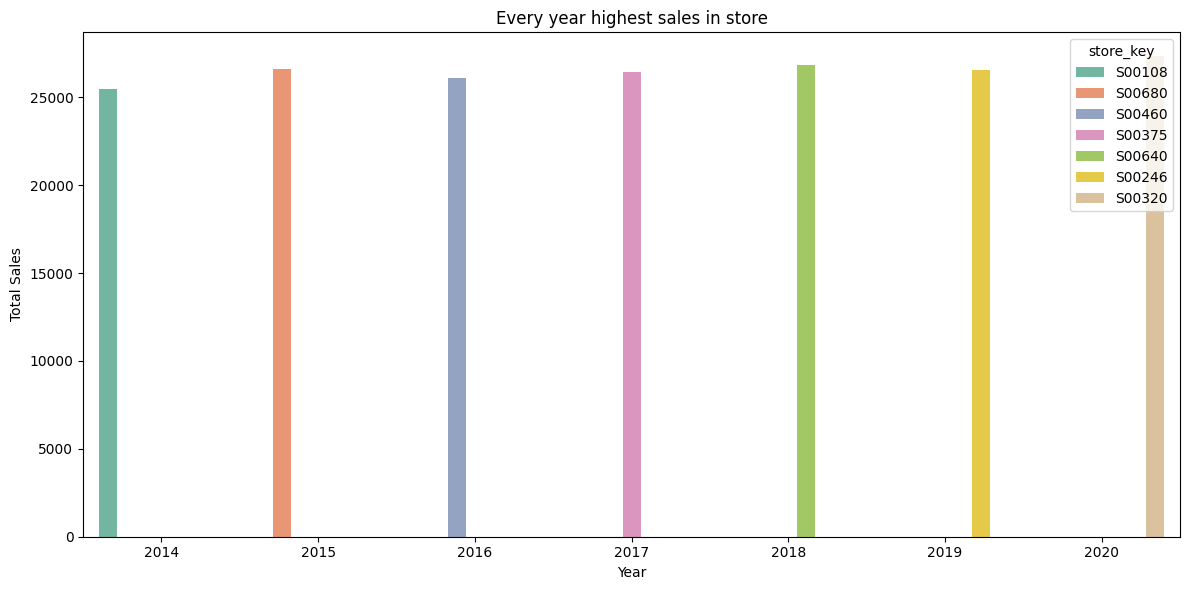

In [ ]:
plt.figure(figsize=(12, 6))
a = sns.barplot(data = top_sales_store_year[top_sales_store_year['year'] != 2021],
                x = 'year', y = 'total_sales', hue='store_key', palette='Set2')
plt.title('Every year highest sales in store')
plt.xlabel('Year')
plt.ylabel('Total Sales')


plt.tight_layout()
plt.show()

From the above analysis, the highest sales happened in the year **2015** in store **S0010**.

Since the data available for the 2021 is only from 1st Jan 2021 to 23rd Jan 2021, the total sales is very less. Hence, we have ignored here.

## Every year highest sold item (quantity and total price)

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Every year highest sold item</strong></h1>
</div>

In [ ]:
q1 = """
select year, item_description, total_quantity_sold, total_sales_amount, q_rnk
from(
select year, item_description, total_quantity_sold, total_sales_amount,
dense_rank() over (partition by year order by total_quantity_sold desc) as q_rnk
from(
select year, item_description, sum(quantity) as total_quantity_sold, round(sum(total_price), 1) as total_sales_amount
from df
group by year, item_description
order by total_quantity_sold desc) a
) b
where q_rnk = 1
order by year
"""
total_quantity_sold = pd.read_sql_query(q1, ecom_db)
total_quantity_sold

,year,item_description,total_quantity_sold,total_sales_amount,q_rnk
0,2014,a. Beverage - Soda,88879,877300.0,1
1,2015,Food - Healthy,94796,1497118.5,1
2,2016,a. Beverage - Soda,93637,924687.8,1
3,2017,a. Beverage - Soda,93508,916345.3,1
4,2018,a. Beverage - Soda,93935,929126.5,1
5,2019,a. Beverage - Soda,94702,933581.8,1
6,2020,a. Beverage - Soda,94988,927722.3,1
7,2021,a. Beverage - Soda,5698,55533.0,1


In [ ]:
q1 = """
select year, item_description, total_quantity_sold, total_sales_amount, q_rnk
from(
select year, item_description, total_quantity_sold, total_sales_amount,
dense_rank() over (partition by year order by total_sales_amount desc) as q_rnk
from(
select year, item_description, sum(quantity) as total_quantity_sold, round(sum(total_price), 1) as total_sales_amount
from df
group by year, item_description
order by total_sales_amount desc) a
) b
where q_rnk = 1
order by year
"""
total_sales_amount = pd.read_sql_query(q1, ecom_db)
total_sales_amount

,year,item_description,total_quantity_sold,total_sales_amount,q_rnk
0,2014,Food - Healthy,88790,1406845.0,1
1,2015,Food - Healthy,94796,1497118.5,1
2,2016,Food - Healthy,92867,1465907.5,1
3,2017,Food - Healthy,92928,1474811.5,1
4,2018,Beverage - Energy/Protein,43239,1491280.0,1
5,2019,Food - Healthy,93538,1480297.0,1
6,2020,Food - Healthy,93309,1479379.0,1
7,2021,Food - Healthy,5509,87756.0,1


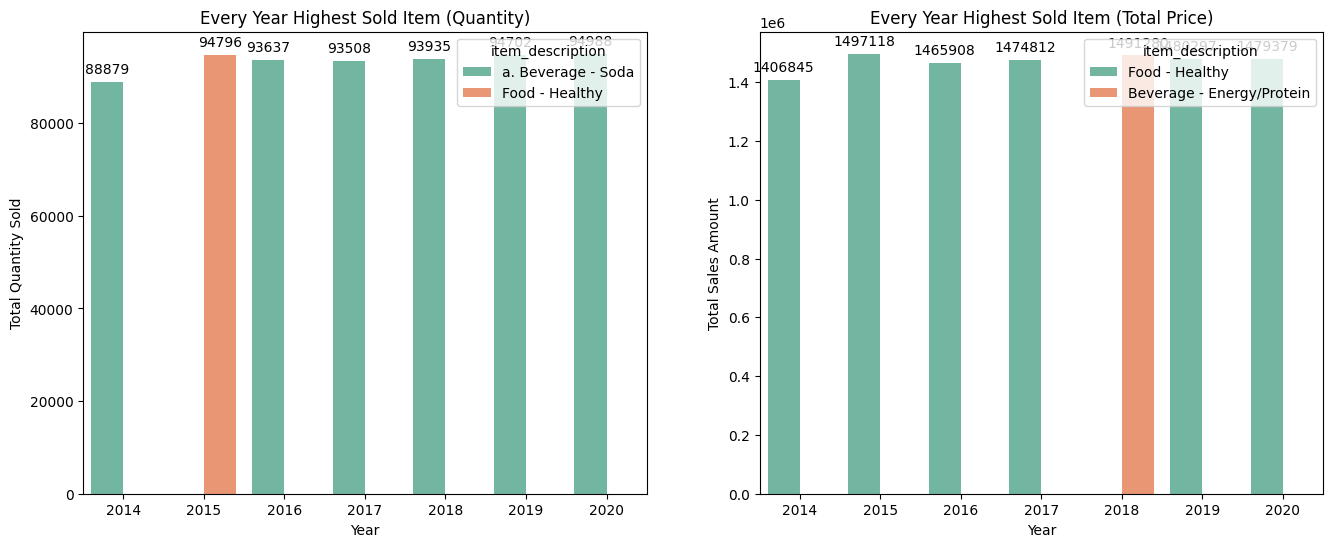

In [ ]:
def disp_va(ax):

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',  # Format the annotation
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # Distance from bar
                    textcoords='offset points')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=total_quantity_sold[total_quantity_sold['year'] != 2021], x='year', y='total_quantity_sold', hue='item_description', palette='Set2', ax=ax1)
ax1.set_title('Every Year Highest Sold Item (Quantity)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Quantity Sold')
disp_va(ax1)

sns.barplot(data=total_sales_amount[total_sales_amount['year'] != 2021], x='year', y='total_sales_amount', hue='item_description', palette='Set2', ax=ax2)
ax2.set_title('Every Year Highest Sold Item (Total Price)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Sales Amount')
disp_va(ax2)



From the above analysis, only 2 item categories are sold highly.
* Beverage - Soda
* Food - Healthy

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Division wise items sold</strong></h1>
</div>

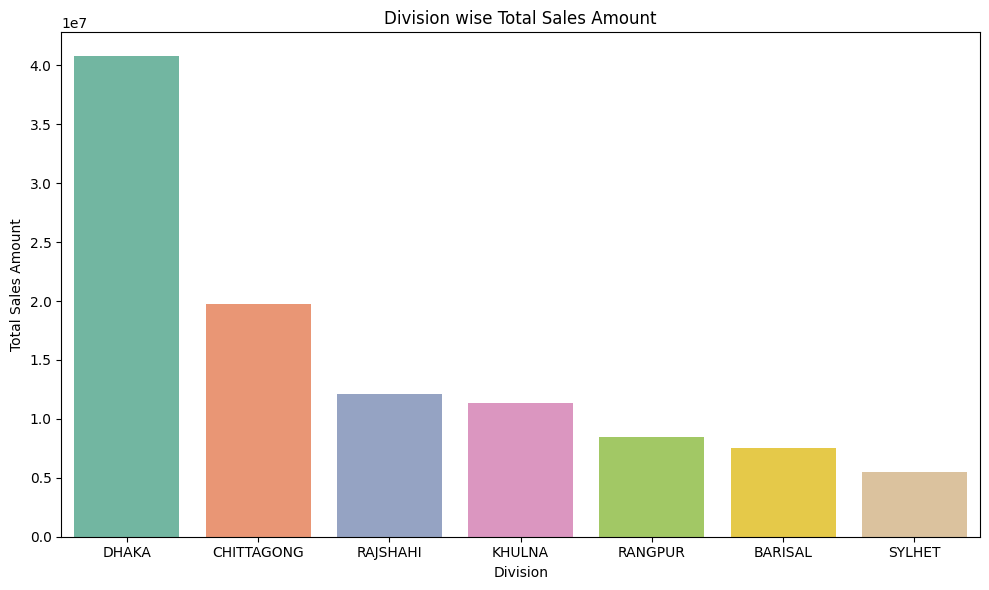

In [ ]:
div_sales = df.groupby(['division'])[['total_price', 'quantity']].sum().sort_values(by=['total_price', 'quantity'], ascending=False).reset_index()


plt.figure(figsize=(10, 6))
a = sns.barplot(data=div_sales, x='division', y='total_price', palette='Set2')
plt.title('Division wise Total Sales Amount')
plt.xlabel('Division')
plt.ylabel('Total Sales Amount')



plt.tight_layout()
plt.show()

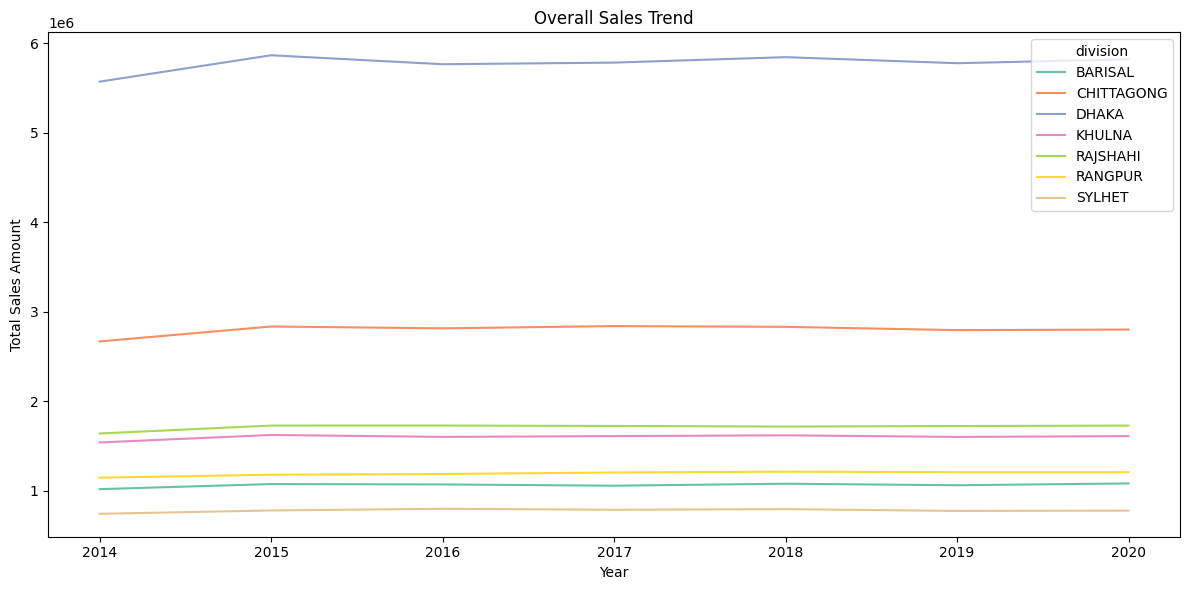

In [ ]:
overall_sales = df.groupby(['year', 'division'])['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=overall_sales[overall_sales['year'] !=2021], x='year', y='total_price', hue='division', palette='Set2')
plt.title('Overall Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

From the above analysis, the more sales happening at Dhaka.
Food-Healthy item is the most sold item in all the division.

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Number of stores per division</strong></h1>
</div>

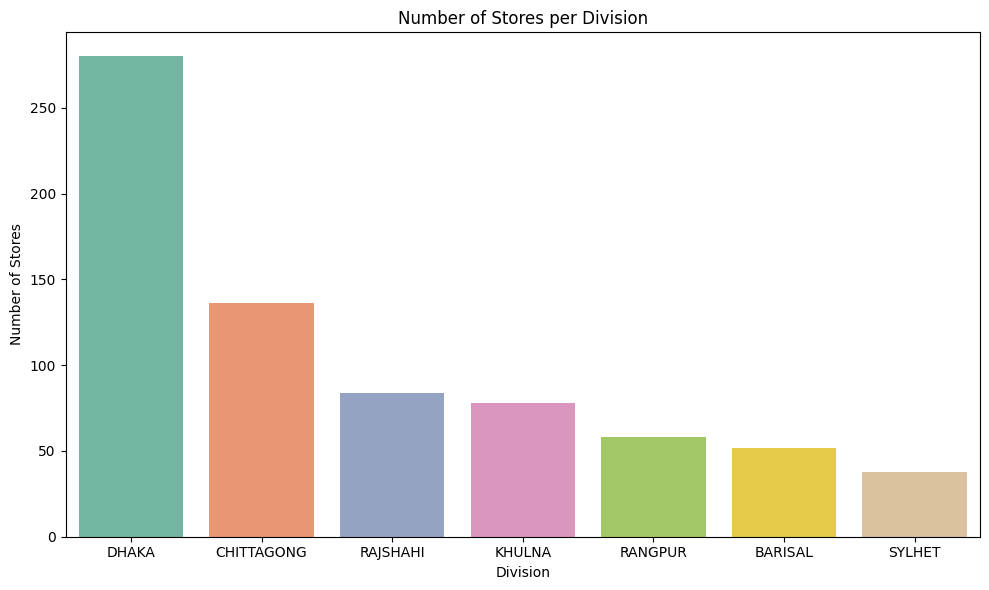

In [ ]:
store_cnt = df.groupby(['division'])['store_key'].nunique().reset_index()
store_cnt = store_cnt.sort_values(by='store_key', ascending=False)

plt.figure(figsize=(10, 6))
a = sns.barplot(data=store_cnt, x='division', y='store_key', palette='Set2')

plt.title('Number of Stores per Division')
plt.xlabel('Division')
plt.ylabel('Number of Stores')


plt.tight_layout()
plt.show()

The number of stores in the divisions Sylhet, Barisal and Rangpur are very less compared to other divisions.

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Sales in diffrent quarters</strong></h1>
</div>

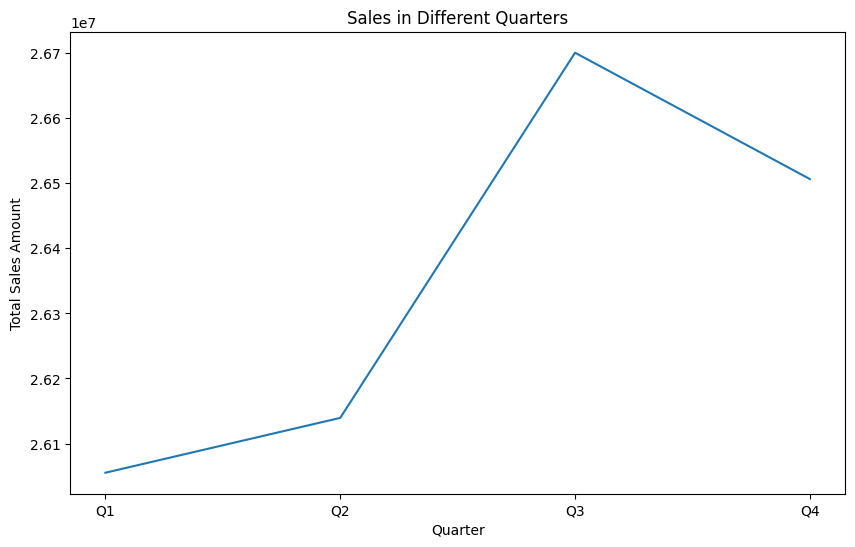

In [ ]:
quarter_sales = df.groupby('quarter')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
a = sns.lineplot(data=quarter_sales, x='quarter', y='total_price', palette='Set2')

plt.title('Sales in Different Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.show()

The total sales in peak in Quarter 3 and less sales in Quarter 1.

In [ ]:
q1 = """
select quarter, item_description, total_quantity_sold
from(
select quarter, item_description, total_quantity_sold,
dense_rank() over (partition by quarter order by total_quantity_sold desc) as q_rnk
from(
select quarter, item_description, sum(quantity) as total_quantity_sold
from df
group by quarter, item_description
) a
) b
where q_rnk = 1 or q_rnk = 2
order by 1
"""
quart_item_sales = pd.read_sql(q1, ecom_db)

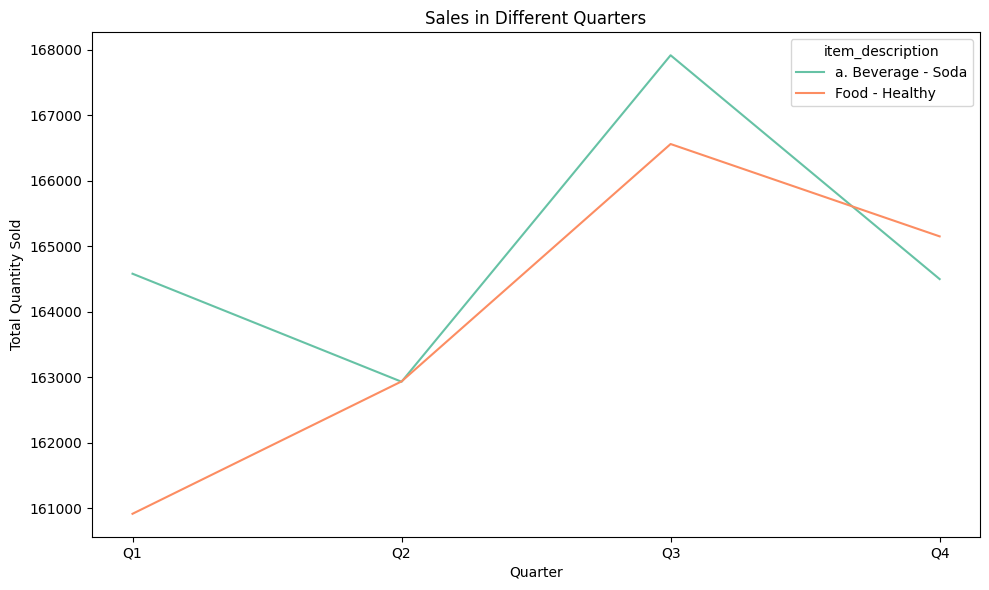

In [ ]:
plt.figure(figsize=(10, 6))
a = sns.lineplot(data=quart_item_sales, x='quarter', y='total_quantity_sold', hue='item_description', palette='Set2')
plt.title('Sales in Different Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')


plt.tight_layout()
plt.show()

* The total quantities sold is at peak in Quarter 3.
* In all quarters, Beverage - Soda & Food - Healthy items are most sold.

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Month wise sales trend</strong></h1>
</div>

In [ ]:
df['month'] = pd.to_datetime(df['month'], format='%B').dt.month

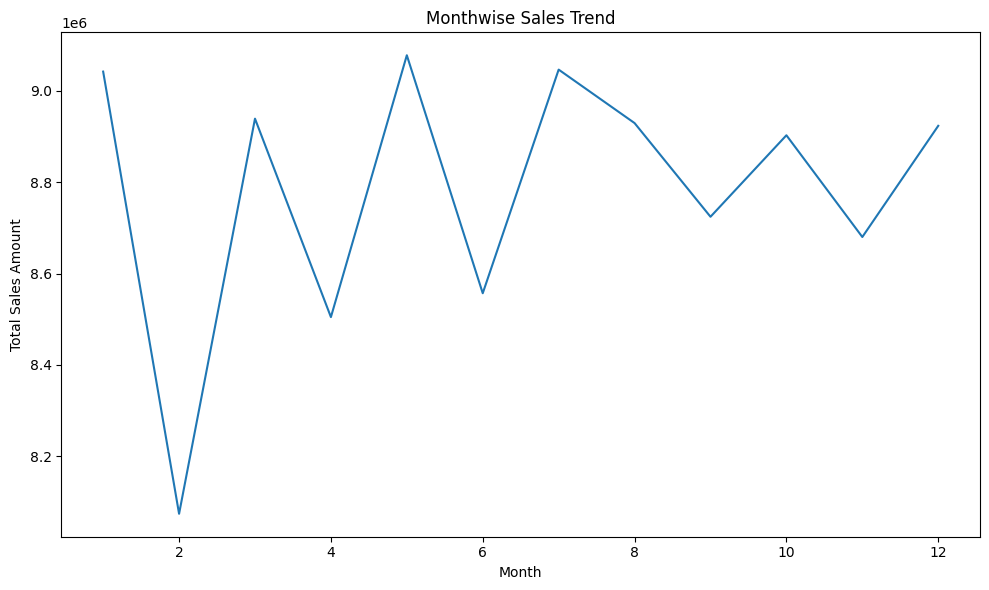

In [ ]:
month_sales = df.groupby('month')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=month_sales, x='month', y='total_price', palette='Set2')
plt.title('Monthwise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Payment methods</strong></h1>
</div>

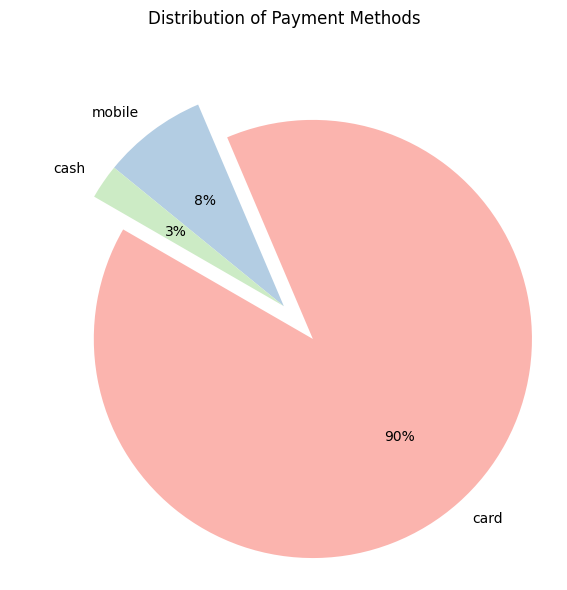

In [ ]:
pay_method = df['trans_type'].value_counts().reset_index()

explode = [0.2, 0, 0]
plt.figure(figsize=(10, 6))
plt.pie(pay_method['count'], labels=pay_method['trans_type'], autopct='%1.0f%%', explode=explode, startangle=150, colors=sns.color_palette('Pastel1'))

plt.title('Distribution of Payment Methods')
plt.tight_layout()
plt.show()

Almost 90% of the customers use card payment method for their transactions.

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Most Used Bank</strong></h1>
</div>

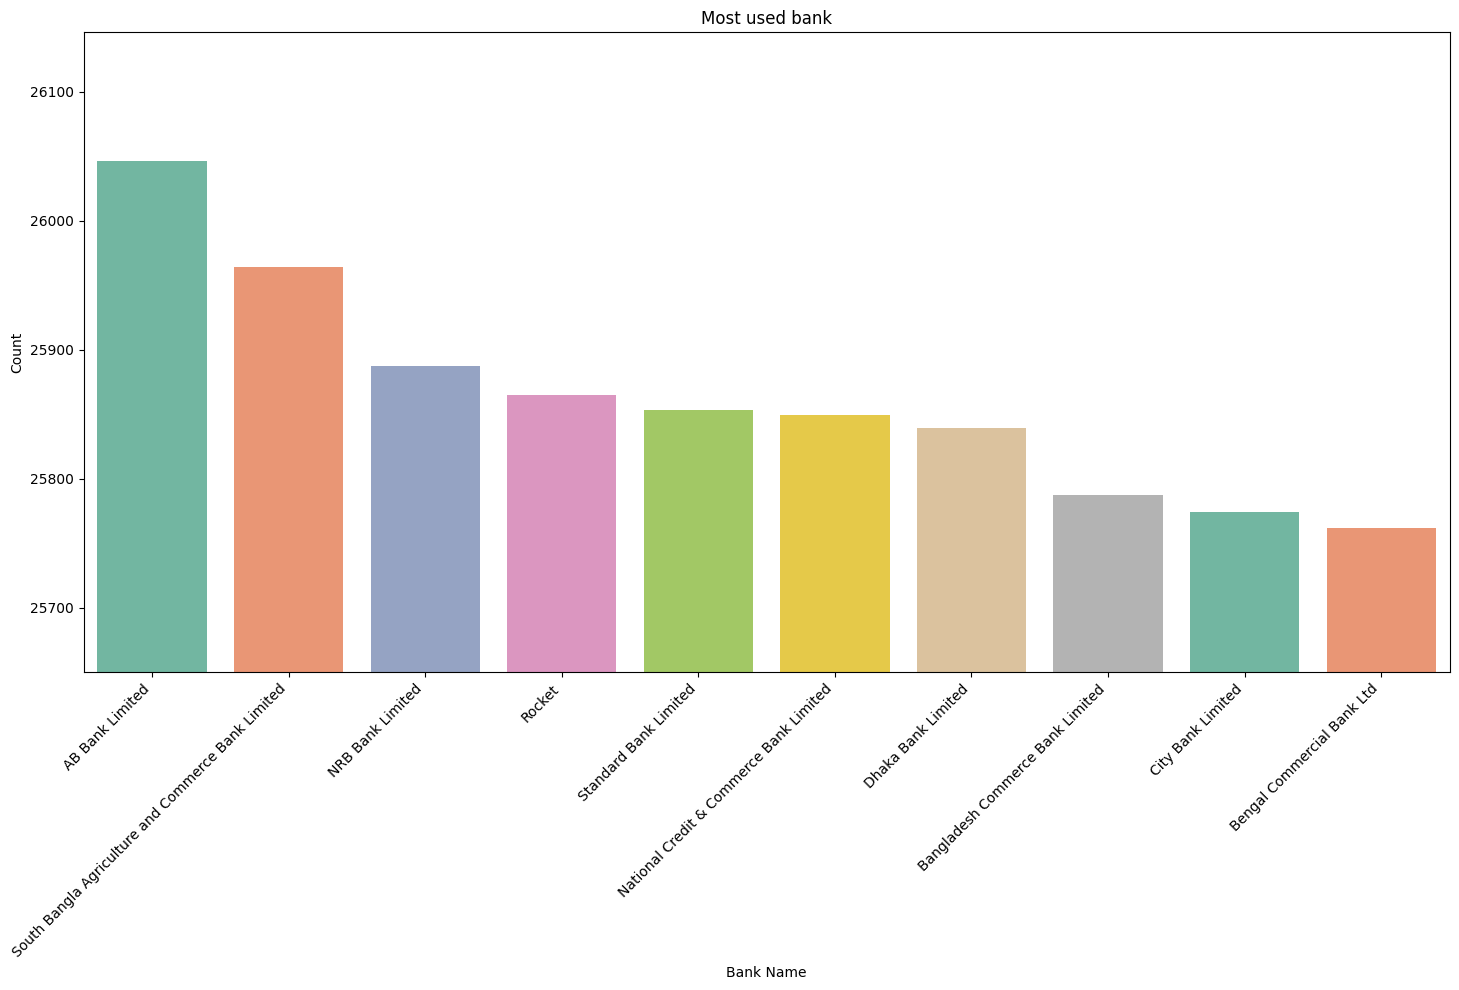

In [ ]:
bank = df['bank_name'].value_counts().reset_index().head(10)

plt.figure(figsize=(15, 10))
a = sns.barplot(data=bank, x='bank_name', y='count', palette='Set2')

plt.title('Most used bank')
plt.xlabel('Bank Name')
plt.ylabel('Count')
plt.ylim(25650, max(bank['count'])+100)
wrapped_labels = ["\n".join(bank.split(" ", 2)[:2]) for bank in bank]
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<div style="background-color: #CFD8DC; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Final Insights & Recommendations</strong></h1>
</div>

## 1. Sales Trends and Performance

* Highest sales occurred in 2015, with store S0010 leading in revenue.
* No significant growth trend in overall sales over the years.
* Sales peak in Q3 (July-Sept), while Q1 has the lowest sales.
* Dhaka has the highest sales, while Sylhet, Barisal, and Rangpur have the lowest.

**Recommendations:**
* Target Q1 promotions to boost sales during slow months.
* Expand store presence in low-sales divisions (Sylhet, Barisal, Rangpur).

## 2. Best-Selling Products

Only two product categories dominate sales:

* Beverage - Soda
* Food - Healthy

These items consistently rank highest across all years, quarters and divisions.

**Recommendations:**
* Diversify the product range to reduce dependence on a few items.
* Increase inventory of top-performing products in high-demand regions.

## 3. Payment Method Analysis

* 90% of transactions use card payments, while mobile and cash payments are much lower.

**Recommendation:**
* Promote mobile payments with extra discounts to encourage usage.
* Identify if cash users have specific characteristics (e.g., older customers) and adapt marketing.

## 4. Bank Preferences

* Top 10 banks dominate transactions, but some banks are rarely used.

**Recommendation:**
* Partner with top banks to offer exclusive discounts for their cardholders.
* Encourage partnerships with underused banks to increase customer reach.

## 5. Customer Preferences Based on Item and Location

* Significant relationships exist between customer segment & product choice.
* Manufacturing country impacts purchase behavior, suggesting brand loyalty.

**Recommendation:**
* Region-specific marketing (e.g., tailor promotions based on local preferences).
* Use customer segment data to personalize product recommendations.

## 6. Short-Term Actions

* Boost sales in Q1 (slowest quarter) with limited-time discounts.
* Re-engage "At Risk" customers through loyalty offers and targeted email campaigns.
* Strengthen partnerships with top banks to increase transaction volume.

## 7. Long-Term Actions

* Expand store presence in underperforming regions.
* Diversify product offerings beyond Beverage-Soda and Food-Healthy.
* Increase adoption of mobile payments via cashback rewards.